#### Import library

In [ ]:
# 라이브러리 추가하기
import geopandas as gpd

%matplotlib inline

#### 서울시 행정동 goeJson 불러오기
* GeoDataframe 생성하기
* 데이터 확인하기
* plot()으로 지도 확인하기

In [ ]:
# _01 서울시 법정동 geojson 파일
_seoul_h_dong = './maps/output/seoul_h_dong.geojson'

In [ ]:
# _02 GeoDataFrame
seoul_h_dong_gdf = gpd.read_file(_seoul_h_dong)
seoul_h_dong_gdf.info()
seoul_h_dong_gdf.head(10)

In [ ]:
# _03 법정동 지도 보기
seoul_h_dong_gdf.plot(color='gray')

####  Dissolve를 이용해 행정동 -> 시군구 지도 데이터 만들기

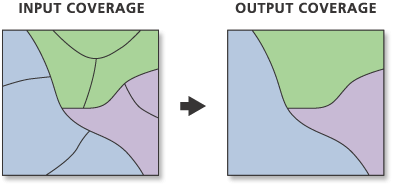

In [ ]:
# _04 Dissolve를 이용해 시군구 데이터 만들기
seoul_sgg = seoul_h_dong_gdf.dissolve(by=['SGG_NM','SGG_CODE'], aggfunc='sum')
seoul_sgg

In [ ]:
# _05 index 초기화하기
seoul_sgg.reset_index(inplace=True)
seoul_sgg

In [ ]:
# _06 정보확인
seoul_sgg.info()
seoul_sgg.head()

In [ ]:
# _07 plot으로 그려보기
seoul_sgg.plot()

In [ ]:
# _08 시군구 geojson 생성하기
# 불필요한 컬럼 제거하기
columns = ['SGG_CODE','SGG_NM','SEDAE','SEDAE_INGU','TOTAL_POP','MALE_POP','FEMALE_POP','65_OVER','geometry']
gdf = gpd.GeoDataFrame(seoul_sgg[columns], geometry='geometry')
gdf.to_file('./maps/output/seoul_sgg.geojson' , driver='GeoJSON')

# 서울시 스타벅스 매장 목록
* 서울시 스타벅스 매장 목록 엑셀 파일 불러오기
* 위도, 경도 좌표 정보를 이용해 GeoDataFrame으로 변환하기
* 서울시 스타벅스 매장 목록 데이터를 지도파일로 저장하기

In [ ]:
# _10 pandas를 이용해 서울시 스타벅스 목록 데이터(엑셀) 불러오기
import pandas as pd
seoul_starbucks = pd.read_excel('./files/seoul_starbucks.xlsx')
seoul_starbucks.info()
seoul_starbucks.head()

In [ ]:
# _11 시군구 코드를 문자타입으로 변경하기
seoul_starbucks = seoul_starbucks.astype({'SIG_CD':'str'})
seoul_starbucks.info()

In [ ]:
# _12 엑셀 파일의 위도 경도 데이터를 Point타압의 geometry 데이터로 변환하기
geometry = gpd.points_from_xy(seoul_starbucks.LONG, seoul_starbucks.LAT)
geometry[0]

In [ ]:
# _13 GeoDataFrame 생성하기
coulumns = ['STORE_NAME', 'STORE_TYPE', 'SIG_CD', 'SIG_KOR_NM']
seoul_sb_gdf = gpd.GeoDataFrame(seoul_starbucks[coulumns], geometry=geometry)
seoul_sb_gdf.info()
seoul_sb_gdf.head()

In [ ]:
# _14 타입 확인
type(seoul_sb_gdf)

In [ ]:
# 폴더생성
!mkdir ./maps/final

In [ ]:
# _15 서울시 스타벅스 매장 지도 파일 생성하기
seoul_sb_gdf.to_file('./maps/final/seoul_starbucks.geojson', driver='GeoJSON')